<a href="https://colab.research.google.com/github/countingtls/PA_HRV_Sleep/blob/main/swell_test_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import sklearn.pipeline
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Read in the dataset

df_test = pd.read_csv("/content/drive/MyDrive/SWELL/hrv dataset/data/final/test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/SWELL/hrv dataset/data/final/train.csv")
print(f"df_train shape{df_train.shape}")
print(f"df_test shape{df_test.shape}")

df_train shape(369289, 36)
df_test shape(41033, 36)


In [ ]:
df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [ ]:
df_train['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

In [ ]:
#check if there is any missing value in the datasets
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   SD1                369289 non-null  float64
 10  SD2                369289 non-null  float64
 11  KURT               369289 non-null  float64
 12  SKEW               369289 non-null  float64
 13  MEAN_REL_RR        369289 non-null  float64
 14  MEDIAN_REL_RR      369289 non-null  float64
 15  SDRR_REL_RR        369289 non-null  float64
 16  RM

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41033 entries, 0 to 41032
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_RR            41033 non-null  float64
 1   MEDIAN_RR          41033 non-null  float64
 2   SDRR               41033 non-null  float64
 3   RMSSD              41033 non-null  float64
 4   SDSD               41033 non-null  float64
 5   SDRR_RMSSD         41033 non-null  float64
 6   HR                 41033 non-null  float64
 7   pNN25              41033 non-null  float64
 8   pNN50              41033 non-null  float64
 9   SD1                41033 non-null  float64
 10  SD2                41033 non-null  float64
 11  KURT               41033 non-null  float64
 12  SKEW               41033 non-null  float64
 13  MEAN_REL_RR        41033 non-null  float64
 14  MEDIAN_REL_RR      41033 non-null  float64
 15  SDRR_REL_RR        41033 non-null  float64
 16  RMSSD_REL_RR       410

None

In [ ]:
#encode the labels
df_train['condition'] = df_train['condition'].map({'no stress':0, 'interruption':1, 'time pressure':2})
df_test['condition'] = df_test['condition'].map({'no stress':0, 'interruption':1, 'time pressure':2})

In [ ]:
df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,1
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,1
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,0


In [ ]:
#df_train_split, df_test_split = train_test_split(df_test, test_size=0.1, random_state=None)

In [ ]:
#Split the datasets into train and test
X_train, y_train, X_test, y_test = df_train.iloc[:, :-1].values, df_train.iloc[:, -1].values, df_test.iloc[:, :-1].values, df_test.iloc[:,-1].values

In [ ]:
#Split the datasets into train and test
#X_train, y_train, X_test, y_test = df_train_split.iloc[:, :-1].values, df_train_split.iloc[:, -1].values, df_test_split.iloc[:, :-1].values, df_test_split.iloc[:,-1].values

In [ ]:
#sScaler = StandardScaler()

In [ ]:
#sScaler.fit(X_train)

In [ ]:
#X_train = sScaler.transform(X_train)
#X_test = sScaler.transform(X_test)

In [ ]:
SelectFeature = SelectKBest(f_classif, k=6)

In [ ]:
X_train.shape

(369289, 35)

In [ ]:
X_train_new = SelectFeature.fit_transform(X_train, y_train)
SelectFeature.get_support(True)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([0, 1, 4, 6, 7, 9])

In [ ]:
SelectFeature.get_support()

array([ True,  True, False, False,  True, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [ ]:
# filter for the top 3 out of 14
filter_top3 = [ False,  False, True, False, False, False,  False,  False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, True,
       False, False, False, False, False, False, False, False]

In [ ]:
# filter for the common 14 features 
filter = [ True,  False, True, False, False, False,  True,  False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, True, True,  True, True, True, True,
       True, True, True, True, True, False, False, False]

In [ ]:
feature_labels = df_train.columns[filter + [False]].values
print(feature_labels)

['MEAN_RR' 'SDRR' 'HR' 'VLF' 'VLF_PCT' 'LF' 'LF_PCT' 'LF_NU' 'HF' 'HF_PCT'
 'HF_NU' 'TP' 'LF_HF' 'HF_LF']


In [ ]:
X_train_new = X_train[:,filter]
X_train_new.shape

(369289, 14)

In [ ]:
X_test_new = X_test[:,filter]
X_test_new.shape

(41033, 14)

In [ ]:
print(X_train_new[0:5,:])

[[8.85157845e+02 1.40972741e+02 6.94999521e+01 2.66189414e+03
  7.22032867e+01 1.00924942e+03 2.73756661e+01 9.84852629e+01
  1.55226025e+01 4.21047142e-01 1.51473715e+00 3.68666616e+03
  6.50180547e+01 1.53803433e-02]
 [9.39425371e+02 8.13177420e+01 6.43631499e+01 2.31426545e+03
  7.69757281e+01 6.90113275e+02 2.29541394e+01 9.96953974e+01
  2.10852542e+00 7.01325249e-02 3.04602574e-01 3.00648725e+03
  3.27296635e+02 3.05533236e-03]
 [8.98186047e+02 8.44972358e+01 6.74500656e+01 1.37388711e+03
  5.11522253e+01 1.29822262e+03 4.83351036e+01 9.89504718e+01
  1.37697294e+01 5.12671162e-01 1.04952818e+00 2.68587946e+03
  9.42809098e+01 1.06066011e-02]
 [8.81757865e+02 9.03705372e+01 6.88095618e+01 2.41035741e+03
  7.01803082e+01 1.00598166e+03 2.92903047e+01 9.82247061e+01
  1.81819135e+01 5.29387172e-01 1.77529390e+00 3.43452098e+03
  5.53287013e+01 1.80738022e-02]
 [8.09625331e+02 6.27662422e+01 7.45657275e+01 1.15117733e+03
  4.39183664e+01 1.42178205e+03 5.42421601e+01 9.67200073e+01


In [ ]:
train_xc=X_train_new[:,1]
train_yc=X_train_new[:,5]
train_zc=X_train_new[:,8]

In [ ]:
print(X_test_new[0:5,:])

[[7.21901897e+02 7.47223152e+01 8.41218683e+01 1.01607376e+03
  5.98181170e+01 6.15914573e+02 3.62600152e+01 9.02397114e+01
  6.66170571e+01 3.92186776e+00 9.76028863e+00 1.69860539e+03
  9.24559865e+00 1.08159573e-01]
 [8.43538633e+02 5.84994291e+01 7.14786420e+01 7.65518473e+02
  3.24525601e+01 1.56686614e+03 6.64240240e+01 9.83368490e+01
  2.65000862e+01 1.12341592e+00 1.66315100e+00 2.35888469e+03
  5.91268317e+01 1.69127953e-02]
 [9.58523868e+02 1.32849110e+02 6.38742930e+01 2.23773991e+03
  5.16962175e+01 2.07486888e+03 4.79335748e+01 9.92335845e+01
  1.60249348e+01 3.70207687e-01 7.66415523e-01 4.32863372e+03
  1.29477524e+02 7.72334817e-03]
 [8.24838669e+02 1.17822094e+02 7.43305312e+01 2.33098096e+03
  8.16613253e+01 5.05886664e+02 1.77227426e+01 9.66413485e+01
  1.75814704e+01 6.15932177e-01 3.35865152e+00 2.85444909e+03
  2.87738540e+01 3.47537733e-02]
 [7.56707933e+02 1.43968457e+02 8.20920491e+01 4.75062445e+03
  8.94651576e+01 5.24203971e+02 9.87196345e+00 9.37077469e+01


In [ ]:
test_xc=X_test_new[:,1]
test_yc=X_test_new[:,5]
test_zc=X_test_new[:,8]

In [ ]:
colormap = np.array(['g', 'b', 'r'])

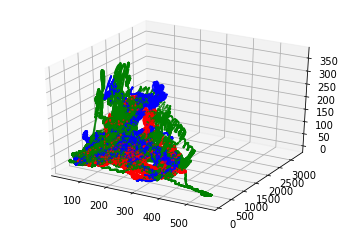

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(train_xc, train_yc, train_zc, s=1, c=colormap[y_train])
plt.show()

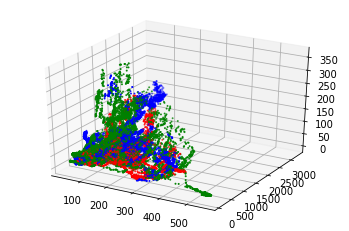

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(test_xc, test_yc, test_zc, s=1, c=colormap[y_test])
plt.show()

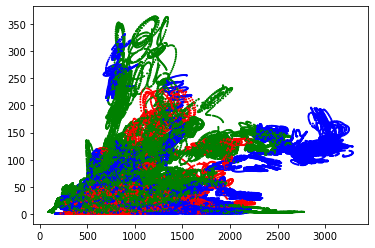

In [ ]:
#fig = plt.figure()
#ax = fig.gca(projection='3d')

plt.scatter(train_yc, train_zc, s=1, c=colormap[y_train])
plt.show()

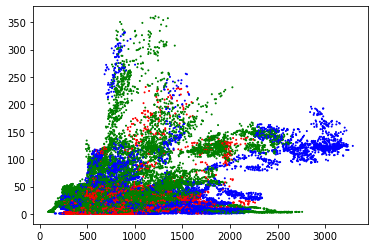

In [ ]:
#fig = plt.figure()
#ax = fig.gca(projection='3d')

plt.scatter(test_yc, test_zc, s=1, c=colormap[y_test])
plt.show()

In [ ]:
# Random Forest Model
RFC = RandomForestClassifier(n_estimators=10, max_features='log2', n_jobs=-1)

In [ ]:
RFC.fit(X_train_new, y_train)

RandomForestClassifier(max_features='log2', n_estimators=10, n_jobs=-1)

In [ ]:
RFC.score(X_test_new, y_test)

0.9998537762288889

In [ ]:
RFC_cf=confusion_matrix(y_test, RFC.predict(X_test_new))
print(RFC_cf)

[[22155     0     3]
 [    1 11781     0]
 [    2     0  7091]]


In [ ]:
import time

start_time = time.time()
importances = RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.108 seconds


In [ ]:
print(std)

[0.02540757 0.01699887 0.03068388 0.01251321 0.01408954 0.01783752
 0.01730192 0.01323881 0.01362011 0.01029909 0.01399972 0.01694305
 0.01059633 0.01069853]


['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'feature 10', 'feature 11', 'feature 12', 'feature 13']


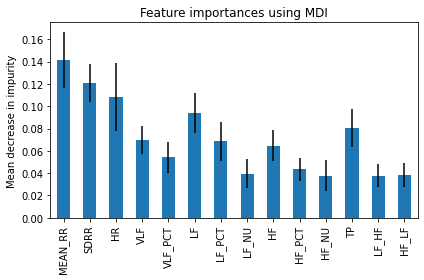

In [ ]:
feature_names = [f"feature {i}" for i in range(X_train_new.shape[1])]
print(feature_names)
#forest_importances = pd.Series(importances, index=feature_names)
forest_importances = pd.Series(importances, index=feature_labels)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(RFC, X_test_new, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_labels)

Elapsed time to compute the importances: 9.768 seconds


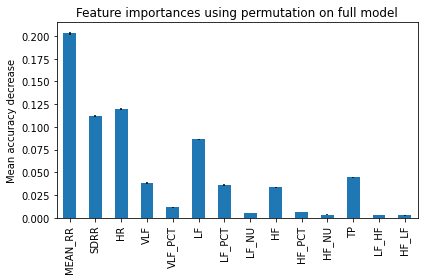

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
#Adaboost model
# Instantiate dt
DTC = DecisionTreeClassifier(max_depth=2, random_state=1)
# Instantiate ada
ADA = AdaBoostClassifier(base_estimator=DTC, n_estimators=100, random_state=1)
ADA.fit(X_train_new, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   n_estimators=100, random_state=1)

In [ ]:
y_pred_proba = ADA.predict_proba(X_test_new)

In [ ]:
#ada_roc_auc = roc_auc_score(y_test, y_pred_proba)
#print('ROC AUC score: {:.2f}'.format(ada_roc_auc))
ADA.score(X_test_new, y_test)

0.6962932274023347

In [ ]:
ADA_y_predict = ADA.predict(X_test_new)
ADA_cf=confusion_matrix(y_test, ADA_y_predict)
print(metrics.classification_report(y_test, ADA_y_predict))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78     22158
           1       0.68      0.53      0.60     11782
           2       0.62      0.49      0.55      7093

    accuracy                           0.70     41033
   macro avg       0.67      0.62      0.64     41033
weighted avg       0.69      0.70      0.69     41033



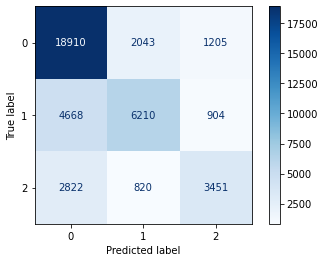

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, ADA_y_predict, display_labels=ADA.classes_, 
                                                normalize=None, cmap=plt.cm.Blues)
plt.show()

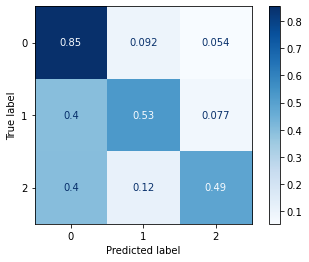

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, ADA_y_predict, display_labels=ADA.classes_, 
                                                normalize='true', cmap=plt.cm.Blues)
plt.show()

In [ ]:
#xgb model
XGB = XGBClassifier()

In [ ]:
#fit the model
XGB.fit(X_train_new, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
XGB.score(X_test_new, y_test)

0.7123047303389954

In [ ]:
XGB_y_predict = XGB.predict(X_test_new)
XGB_cf=confusion_matrix(y_test, XGB_y_predict)
print(metrics.classification_report(y_test, XGB_y_predict))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80     22158
           1       0.80      0.53      0.63     11782
           2       0.72      0.31      0.43      7093

    accuracy                           0.71     41033
   macro avg       0.74      0.59      0.62     41033
weighted avg       0.73      0.71      0.69     41033



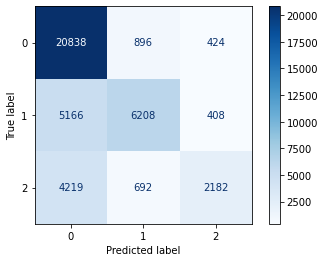

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, XGB_y_predict, display_labels=XGB.classes_, 
                                                normalize=None, cmap=plt.cm.Blues)
plt.show()

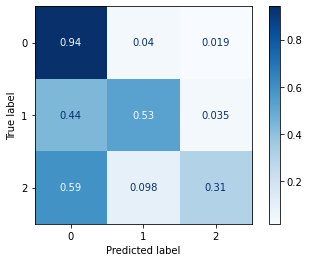

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, XGB_y_predict, display_labels=XGB.classes_, 
                                                normalize='true', cmap=plt.cm.Blues)
plt.show()

In [ ]:
#Multi-layer NN model 20 hidden layers 300 nodes
MLPC = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(20, 300), 
                     max_iter=10000, early_stopping=True, random_state=42)

In [ ]:
MLPC.fit(X_train_new, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 300), max_iter=10000,
              random_state=42)

In [ ]:
MLPC.score(X_test_new, y_test)

0.8166841322837716

In [ ]:
MLPC_y_predict = MLPC.predict(X_test_new)
MLPC_cf=confusion_matrix(y_test, MLPC_y_predict)
print(metrics.classification_report(y_test, MLPC_y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     22158
           1       0.81      0.76      0.78     11782
           2       0.78      0.66      0.71      7093

    accuracy                           0.82     41033
   macro avg       0.81      0.77      0.79     41033
weighted avg       0.81      0.82      0.81     41033



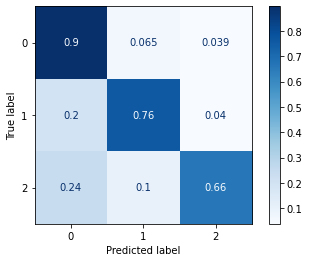

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, MLPC_y_predict, display_labels=MLPC.classes_, 
                                                normalize=None, cmap=plt.cm.Blues)
plt.show()

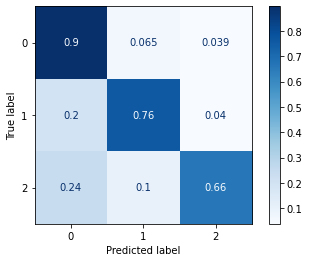

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, MLPC_y_predict, display_labels=MLPC.classes_, 
                                                normalize='true', cmap=plt.cm.Blues)
plt.show()

In [ ]:
#Multi-layer NN model 20 hidden layers 200 nodes
MLPC = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(20, 200), 
                     max_iter=10000, early_stopping=True, random_state=42)

In [ ]:
MLPC.fit(X_train_new, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 200), max_iter=10000,
              random_state=42)

In [ ]:
MLPC.score(X_test_new, y_test)

0.799917139863037

In [ ]:
MLPC_cf=confusion_matrix(y_test, MLPC.predict(X_test_new))
print(MLPC_cf)

[[18989  1523  1646]
 [ 2139  8873   770]
 [ 1555   577  4961]]


In [ ]:
#Multi-layer NN model 20 hidden layers 300 nodes
MLPC = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(20, 100), 
                     max_iter=10000, early_stopping=True, random_state=42)

In [ ]:
MLPC.fit(X_train_new, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 100), max_iter=10000,
              random_state=42)

In [ ]:
MLPC.score(X_test_new, y_test)

0.7708673506689737

In [ ]:
MLPC_y_predict = MLPC.predict(X_test_new)
MLPC_cf=confusion_matrix(y_test, MLPC_y_predict)
print(metrics.classification_report(y_test, MLPC_y_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83     22158
           1       0.78      0.70      0.74     11782
           2       0.71      0.54      0.61      7093

    accuracy                           0.77     41033
   macro avg       0.76      0.71      0.73     41033
weighted avg       0.77      0.77      0.76     41033



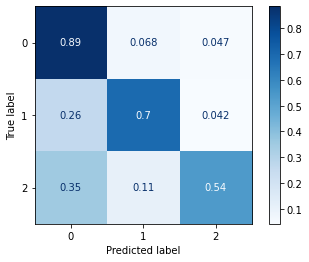

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, MLPC_y_predict, display_labels=MLPC.classes_, 
                                                normalize=None, cmap=plt.cm.Blues)
plt.show()

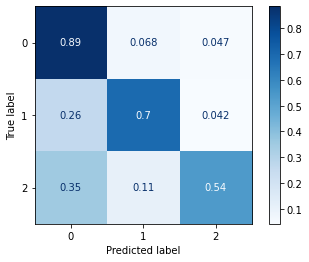

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, MLPC_y_predict, display_labels=MLPC.classes_, 
                                                normalize='true', cmap=plt.cm.Blues)
plt.show()